In [1]:
import sys
!{sys.executable} --version

!{sys.executable} -m pip install newsapi-python
!{sys.executable} -m spacy download en_core_web_sm

Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
from keras.models import load_model
from keras.preprocessing import text, sequence
import numpy as np
from newsapi import NewsApiClient
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
import spacy
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("/kaggle/input/fake-news-classification/WELFake_Dataset.csv")
mapper = {
    0 : "fake",
    1 : "real",
}
df.fillna("")
headline = df["title"]
news = df["text"]
df["tot_news"] = df["title"].astype("str") + " " + df["text"].astype("str")
tot_news = df["tot_news"]
labels = df["label"]
fake_news = news[labels == 0]
real_news = news[labels == 1]
X = tot_news

Y = labels.values
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=73939133)
max_features = 10000
maxlen = 300
tokenizer = text.Tokenizer(num_words=max_features, lower=None)
tokenizer.fit_on_texts(x_train)
model4 = load_model('/kaggle/input/test4-keras/test4.keras')

In [4]:
def get_news_url(search_words):
    # Init
    newsapi = NewsApiClient(api_key='20a033afa85e4b72af903562634d7f6d')

    dummy_url = 'https://www.usatoday.com/story/money/retail/2023/11/26/holiday-shopping-online-scams-tips/71712096007/'
    top_headlines = newsapi.get_everything(q=search_words,
                                            language='en')

    if top_headlines['totalResults'] == 0:
        news_url = dummy_url
    else:
        news_url = top_headlines['articles'][0]['url']
        title = top_headlines['articles'][0]['title']
    return news_url, title

In [5]:
def get_news_text(url):
    # Function to scrape news article text from a given URL using BeautifulSoup
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    article_text = ''
    for paragraph in soup.find_all('p'):  # Adjust 'p' to the appropriate HTML tag for paragraphs
        article_text += paragraph.get_text() + '\n'
    return article_text

def analyze_sentiment(text):
    # Function to analyze sentiment using TextBlob
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

def classify_topic(text):
    # Function to classify topics using spaCy
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    topics = [token.text for token in doc if token.pos_ == 'NOUN']
    return topics


In [6]:
search_keywords = input('Enter the Topic you want to search')

Enter the Topic you want to search India's Budget


In [7]:
news_url , title= get_news_url(search_keywords)  
news_article_text = get_news_text(news_url)


sentiment_score = analyze_sentiment(news_article_text)
sentiment_label = "Positive" if sentiment_score > 0 else "Negative" if sentiment_score < 0 else "Neutral"

# Classify topics
topics = classify_topic(news_article_text)

# Display results
print('New Article Title:', title)
print('News Article Link:', news_url)
print("Sentiment:", sentiment_label)
print("Topics:", topics)
print("-" * 50)
print("Article Text:", news_article_text)
print("-" * 50)


New Article Title: Bracing for Impact: AGI Trades
News Article Link: https://slashdot.org/story/24/01/22/1732257/bracing-for-impact-agi-trades
Sentiment: Positive
Topics: ['account', 'moderation', 'system', 'comments', 'way', 'gobbledygook', 'distance', 'revolution', 'distance', 'amount', 'sense', 'question', 'author', 'sanity', 'distance', 'revolutions', 'one', 'revolution', 'distance', 'amount', 'sense', 'question', 'author', 'sanity', 'article', 'article', 'blog', 'post', 'hip', 'thing', 'Humans', 'humans', 'art', 'thou', 'Bots', 'demons', 'LLMs', 'text', 'questions', 'distance', 'LLMs', 'text', 'questions', 'distance', 'assembly', 'lines', 'unemployment', 'project', 'budget', 'repeat?I', 'case', 'assembly', 'lines', 'unemployment', 'project', 'budget', 'repeat', 'case', 'automation', 'plenty', 'job', 'losses', 'plenty', 'job', 'gains', 'unemployment', 'rate', '%', 'Today', '%', 'systems', 'tasks', 'person', 'reality', 'point', 'improvement', 'one', 'reason', 'tasks', 'things', 'fai

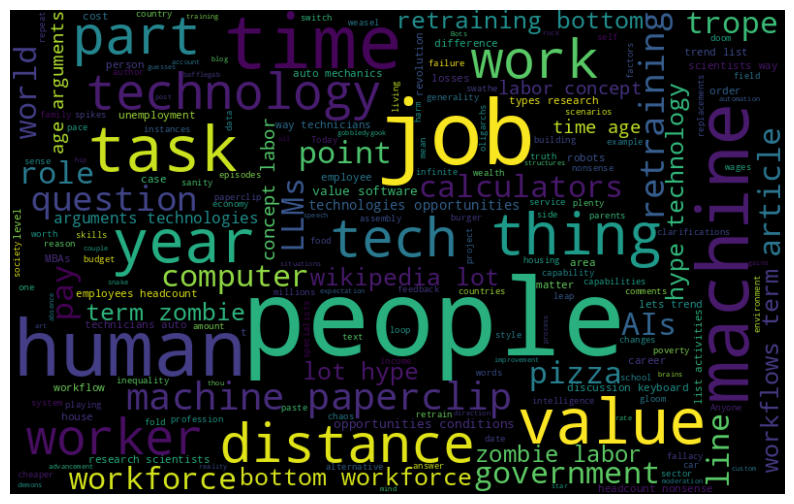

In [8]:
all_words = ' '.join([text for text in topics])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show('example.png')

In [9]:
# Preprocess the new text
tokenized_new_text = tokenizer.texts_to_sequences([news_article_text])
padded_new_text = sequence.pad_sequences(tokenized_new_text, maxlen=maxlen)

# Use the model to predict the label
predicted_prob = model4.predict(padded_new_text)
predicted_label = int(np.round(predicted_prob)[0])  # Convert to scalar

# Map the predicted label to the corresponding class ("fake" or "real")
predicted_class = mapper[predicted_label]

print(f"Predicted Label: {predicted_class}")

1/1 [==============================] - 2s 2s/step
Predicted Label: real


In [10]:
def classify_a_text(text):
    # Preprocess the new text
    tokenized_new_text = tokenizer.texts_to_sequences([text])
    padded_new_text = sequence.pad_sequences(tokenized_new_text, maxlen=maxlen)

    # Use the model to predict the label
    predicted_prob = model4.predict(padded_new_text)
    predicted_label = int(np.round(predicted_prob)[0])  # Convert to scalar

    # Map the predicted label to the corresponding class ("fake" or "real")
    predicted_class = mapper[predicted_label]

    print(f"Predicted Label: {predicted_class}")

In [11]:
NEW_TEXT = input('ENTER TEXT YOU WANT TO CLASSIFY')

ENTER TEXT YOU WANT TO CLASSIFY The following comments are owned by whoever posted them.  We are not responsible for them in any way.  ... we're well prepared with gobbledygook. What is the euclidean distance of reskilling in prior revolutions?This one at least is easy to answer: after any revolution, you end up back where you started so the Euclidean distance will always be zero....which coincidentally, is also the amount of sense this question makes.   I suspect the author is more than a few Teslas away from sanity. What is the euclidean distance of reskilling in prior revolutions? This one at least is easy to answer: after any revolution, you end up back where you started so the Euclidean distance will always be zero....which coincidentally, is also the amount of sense this question makes.   I suspect the author is more than a few Teslas away from sanity. I was wondering if the article was AI-generated. This isn't an article. It isn't even a blog post. I'm guessing it's written by s

In [12]:
classify_a_text(NEW_TEXT)

1/1 [==============================] - 0s 197ms/step
Predicted Label: real
